# Dataset: UCI
https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#from scipy.stats import loguniform
from sklearn.model_selection import GridSearchCV
#from yellowbrick.features import FeatureImportances
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport

In [4]:
data=pd.read_excel('default of credit card clients.xls',header=1)
pd.options.display.max_columns = None

In [5]:
display(data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
#to check if i have any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
# List of column names to convert to float
columns_to_convert = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Convert specific columns to float
data[columns_to_convert] = data[columns_to_convert].astype(float)

In [8]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [9]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [10]:
# Marriage category '0' is not documented in UCI
data = data.drop(data[data['MARRIAGE']==0].index)

# Education categories 0, 5 and 6 are not documented in UCI
data = data.drop(data[data['EDUCATION']==0].index)
data = data.drop(data[data['EDUCATION']==5].index)
data = data.drop(data[data['EDUCATION']==6].index)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          29601 non-null  int64  
 1   LIMIT_BAL                   29601 non-null  float64
 2   SEX                         29601 non-null  int64  
 3   EDUCATION                   29601 non-null  int64  
 4   MARRIAGE                    29601 non-null  int64  
 5   AGE                         29601 non-null  int64  
 6   PAY_0                       29601 non-null  int64  
 7   PAY_2                       29601 non-null  int64  
 8   PAY_3                       29601 non-null  int64  
 9   PAY_4                       29601 non-null  int64  
 10  PAY_5                       29601 non-null  int64  
 11  PAY_6                       29601 non-null  int64  
 12  BILL_AMT1                   29601 non-null  float64
 13  BILL_AMT2                   296

In [12]:
data['MARRIAGE'].value_counts()

2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

In [13]:
data['EDUCATION'].value_counts()

2    14024
1    10581
3     4873
4      123
Name: EDUCATION, dtype: int64

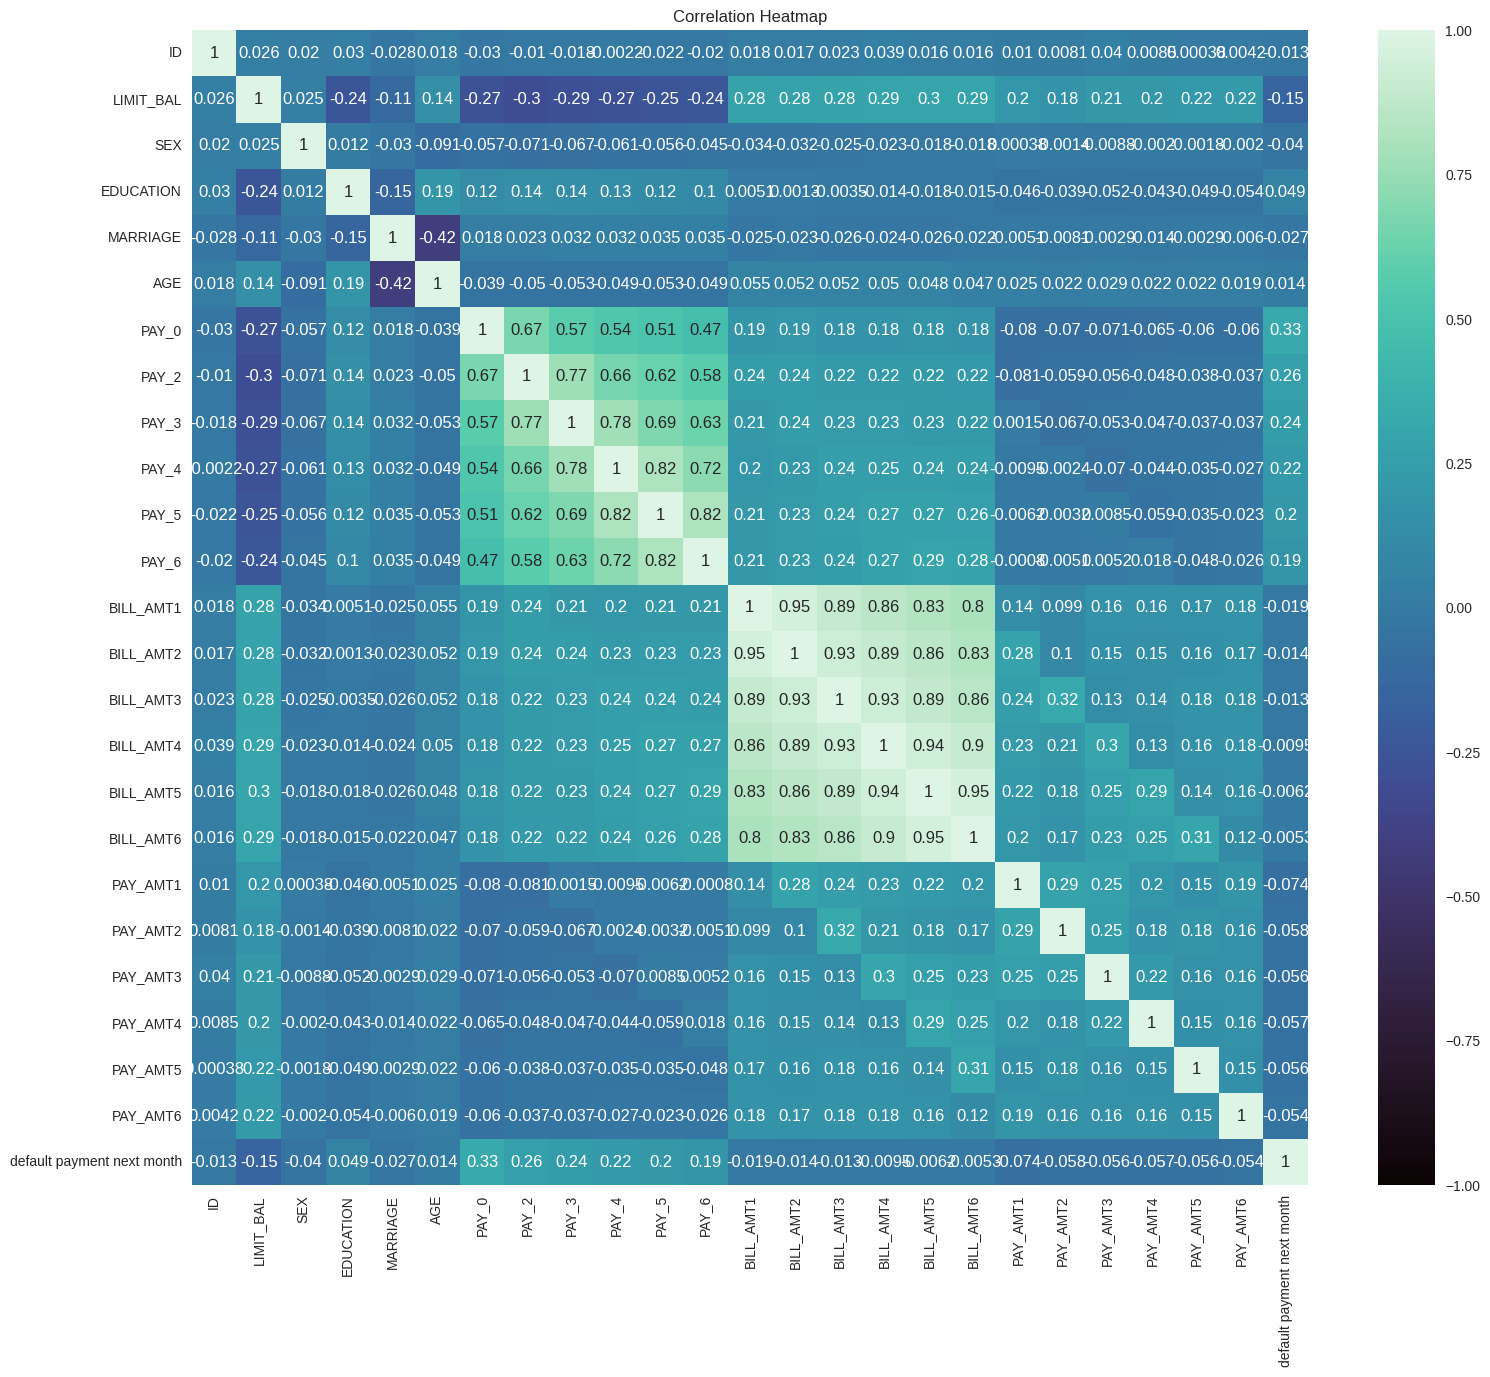

In [61]:
corr = data.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

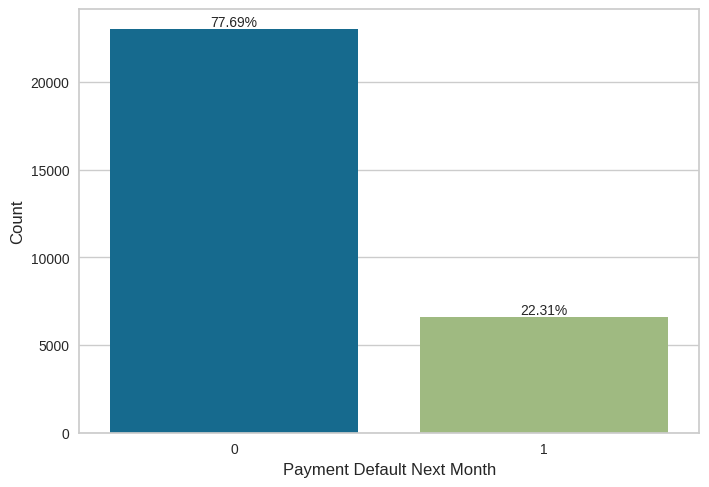

In [14]:
#Distribution of the target variable

sns.countplot(x='default payment next month', data=data)
plt.xlabel("Payment Default Next Month", size=12)
plt.ylabel("Count", size=12)

# Calculate the percentage of each category
total = len(data)
counts = data['default payment next month'].value_counts()
percentages = counts / total * 100

# Add text annotations to each bar
for i, count in enumerate(counts):
    percentage = percentages[i]
    plt.text(i, count, f"{percentage:.2f}%", ha='center', va='bottom', fontsize=10)

plt.show()



In [15]:
# Drop the 'ID' column
data.drop('ID', axis=1, inplace=True)
# rename variable 'PAY_0' to 'PAY_1'
data.rename(columns={"PAY_0": "PAY_1"}, inplace=True)
# rename target variable: 'default paymen next month' to 'Default'
data.rename(columns={"default payment next month": "default"}, inplace=True)
# Class label to category
data["default"] = data["default"].astype('category')

In [16]:
# Payment delay description
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [17]:
# as per the uci page PAY_n can take as values only -1,1,2,3,4,5,6,7,8,9
for pb in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  # categories -2,-1 are grouped into a single class -1: pay duty
  filter = (data[pb] == -2) | (data[pb] == -1)
  data.loc[filter, pb] = -1
  # print(data[pb].unique())
  # moreover the category 0 is undocumented
  # so each category >= 0 has been updated by adding 1
  data[pb] = data[pb].astype('int64')
  filter = (data[pb] >= 0)
  data.loc[filter, pb] = data.loc[filter, pb] + 1


In [18]:
# Payment delay description
data[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,0.794770,0.666329,0.638492,0.591939,0.550894,0.520759
std,1.339224,1.397190,1.389153,1.350751,1.309342,1.325013
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [19]:
# Set 'category' type to categorical attributes
for one_hot_encode in ['EDUCATION', 'MARRIAGE']:
  data[one_hot_encode] = data[one_hot_encode].astype('category')

# one-hot encoding
data=pd.concat([pd.get_dummies(data['EDUCATION'], prefix='EDU'),
                pd.get_dummies(data['MARRIAGE'], prefix='MRG'),
                data],axis=1)

# drop original columns
data.drop(['EDUCATION'],axis=1, inplace=True)
data.drop(['MARRIAGE'],axis=1, inplace=True)
# print samples

data.head()

,EDU_1,EDU_2,EDU_3,EDU_4,MRG_1,MRG_2,MRG_3,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,1,0,0,1,0,0,20000.0,2,24,3,3,-1,-1,-1,-1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,1,0,120000.0,2,26,-1,3,1,1,1,3,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,0,1,0,0,0,1,0,90000.0,2,34,1,1,1,1,1,1,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,0,1,0,0,1,0,0,50000.0,2,37,1,1,1,1,1,1,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,0,1,0,0,1,0,0,50000.0,1,57,-1,1,-1,1,1,1,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [20]:
# Split df into X and y
X = data.iloc[:, :-1]  # Select all columns except the last one as X
y = data.iloc[:, -1]   # Select the last column as y

In [21]:
X.head()

,EDU_1,EDU_2,EDU_3,EDU_4,MRG_1,MRG_2,MRG_3,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,0,0,1,0,0,20000.0,2,24,3,3,-1,-1,-1,-1,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,1,0,120000.0,2,26,-1,3,1,1,1,3,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,0,1,0,0,0,1,0,90000.0,2,34,1,1,1,1,1,1,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,0,1,0,0,1,0,0,50000.0,2,37,1,1,1,1,1,1,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,0,1,0,0,1,0,0,50000.0,1,57,-1,1,-1,1,1,1,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [22]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: category
Categories (2, int64): [0, 1]

*Training*#

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=123)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
dummy_classifier=DummyClassifier(strategy='stratified')
dummy_classifier.fit(X_train_scaled,y_train)
baseline_acc=dummy_classifier.score(X_test_scaled,y_test)
print("Baseline Accuracy: {:.2f}".format(baseline_acc))


Baseline Accuracy: 0.65


In [34]:
#Model1
#Linear SVC
# Create LinearSVC object and fit the model
lsvc = LinearSVC(dual=False)
lsvc.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred_test = lsvc.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:",accuracy)
cv1 = cross_val_score(lsvc, X_train_scaled, y_train, cv=10)
cv1_mean = cv1.mean()
print("Cross-validation:",cv1_mean)

Accuracy: 0.7908402104145553
Cross-validation: 0.7889639639639641


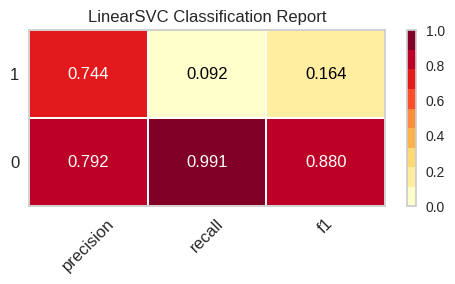

<Axes: title={'center': 'LinearSVC Classification Report'}>

In [35]:
visualizer = ClassificationReport(lsvc, size=(500, 300))
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.poof()

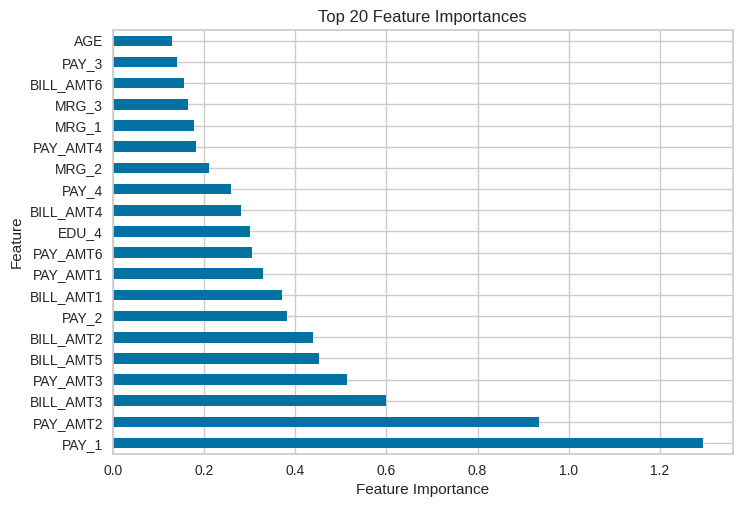

In [37]:
#LinearSVC feature importance
# Retrieve the absolute coefficient values
coef_abs = np.abs(lsvc.coef_[0])

# Create a pandas Series with feature importances
LSVC_importances = pd.Series(coef_abs, index=X.columns)

# Plot the top 20 features with highest importances
LSVC_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.show()

Text(0.5, 1.0, 'K-Nearest Neighbors - Accuracy vs. Number of Neighbors')

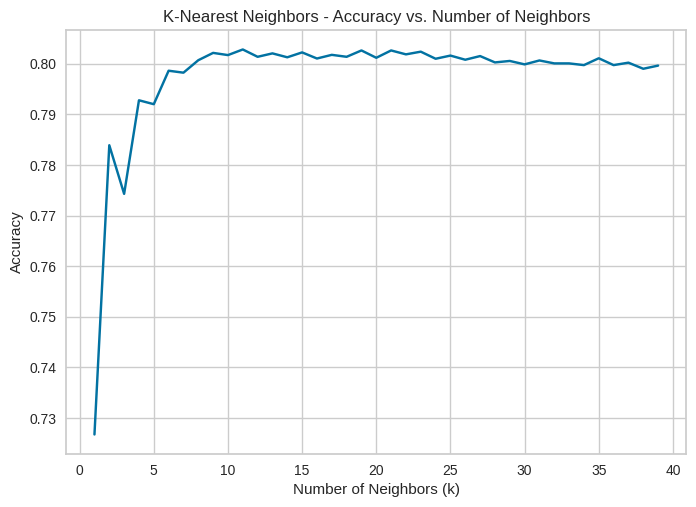

In [38]:
#Model2 KNN

k_values = range(1, 40)  # Range of k values to try
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = np.mean(y_pred == y_test)  # Calculate accuracy
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different k values
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors - Accuracy vs. Number of Neighbors')

In [39]:
best_k = k_values[np.argmax(accuracy_scores)]
print("Best value of k: {}".format(best_k))

Best value of k: 11


In [40]:
k = 11  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


# Predict on the test set
y_pred_test = knn.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:",accuracy)
cv1 = cross_val_score(knn, X_train_scaled, y_train, cv=10)
cv1_mean = cv1.mean()
print("Cross-validation:",cv1_mean)


Accuracy: 0.8028087447517012
Cross-validation: 0.800563063063063


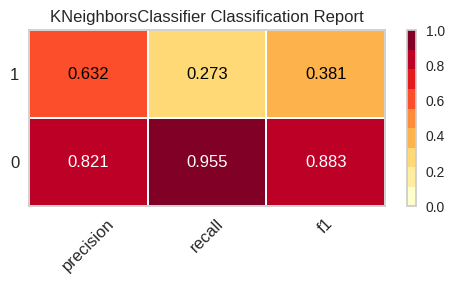

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [29]:
visualizer = ClassificationReport(knn, size=(500, 300))
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.poof()

In [30]:
#Model 3
#SVC
# Create SVC object and fit the model
svc = SVC()
svc.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred_test = svc.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:",accuracy)
cv1 = cross_val_score(svc, X_train_scaled, y_train, cv=10)
cv1_mean = cv1.mean()
print("Cross-validation:",cv1_mean)

Accuracy: 0.8077795473191448
Cross-validation: 0.804954954954955


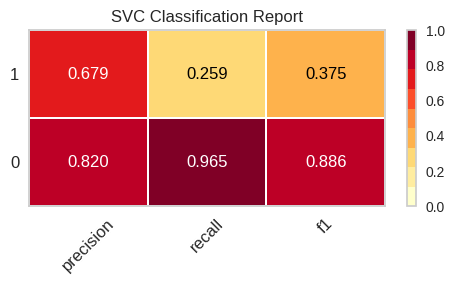

<Axes: title={'center': 'SVC Classification Report'}>

In [31]:
visualizer = ClassificationReport(svc, size=(500, 300))
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.poof()

In [32]:
#Model4
#Logistic Regression
logReg = LogisticRegression(max_iter=150,random_state=42)
logReg.fit(X_train_scaled, y_train)
y_pred = logReg.predict(X_test_scaled)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

cv1 = cross_val_score(logReg, X_train_scaled, y_train, cv=10)
cv1_mean = cv1.mean()
print("Cross-validation:",cv1_mean)

Accuracy: 0.7985618454707785
Cross-validation: 0.7961711711711711


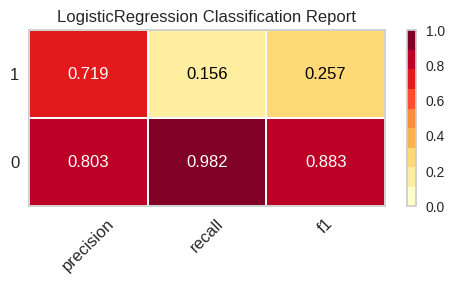

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [33]:
visualizer = ClassificationReport(logReg, size=(500, 300))
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.poof()

In [34]:
#GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=42)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.797725 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3000 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

In [35]:
#Logistic reg with grid search hyperparameters
gridLogReg = LogisticRegression(max_iter=350,random_state = 42, penalty = "l2", C = 100, solver = "lbfgs")
gridLogReg.fit(X_train_scaled, y_train)
grid_pred = gridLogReg.predict(X_test_scaled)
print("Accuracy of predictions:", metrics.accuracy_score(y_test, grid_pred))
#cross-validation
gridcv = cross_val_score(gridLogReg, X_train_scaled, y_train, cv=10)
gridcv = pd.Series(gridcv)
print("Cross-validation: ", gridcv.mean())

Accuracy of predictions: 0.80034747357753
Cross-validation:  0.7978603603603605


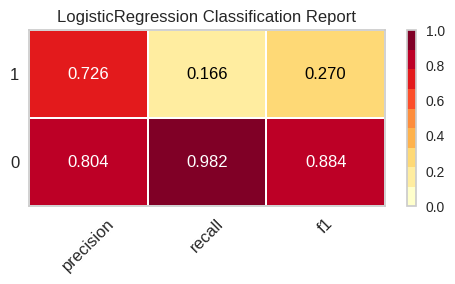

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [36]:
#Log reg classification report visualizer
visualizer = ClassificationReport(gridLogReg, size=(500, 300))
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.poof()

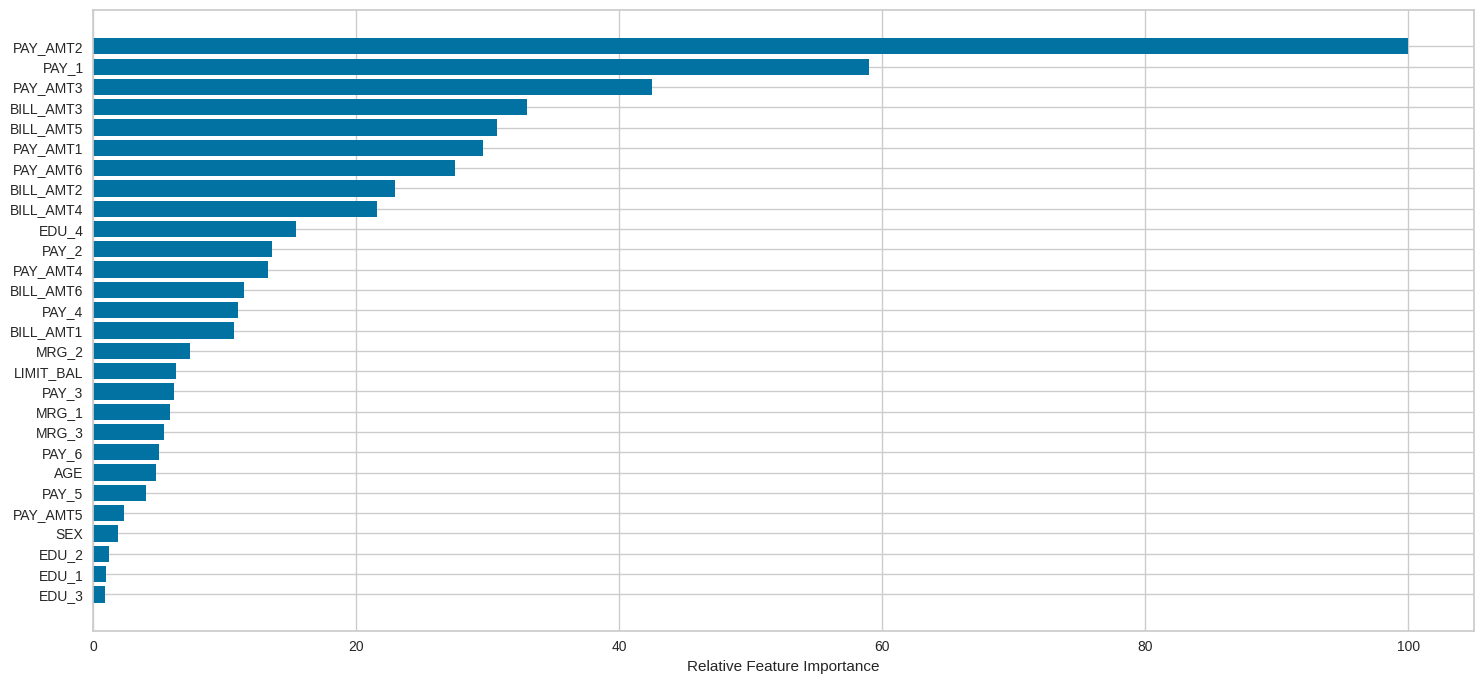

In [37]:
#Log regression feature importance visualization
feature_importance = abs(gridLogReg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure(figsize=(15,7))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Testing Accuracy')

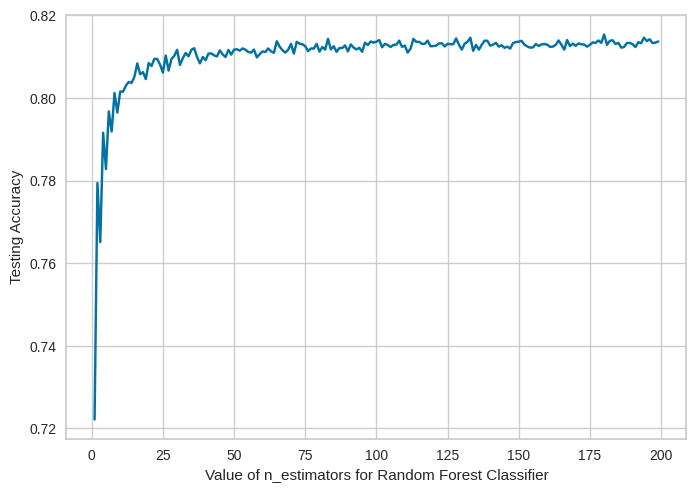

In [38]:
#Model 5
#Random forest n_estimator and testing accuracy
scoresrf =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train_scaled, y_train)
    y_predrf = rfc.predict(X_test_scaled)
    scoresrf.append(accuracy_score(y_test, y_predrf))
import matplotlib.pyplot as plt
plt.plot(range(1, 200), scoresrf)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [39]:
best_n_estimators = scoresrf.index(max(scoresrf)) + 1
print("Best value of n_estimators: {}".format(best_n_estimators))

Best value of n_estimators: 180


In [65]:
#Random Forest model
model_rf = RandomForestClassifier(n_estimators=180, max_features= 6, random_state=42)
model_rf.fit(X_train_scaled, y_train)
predict_rf = model_rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, predict_rf)
print("Accuracy:", accuracy_rf)
#cross-validation
rfcv = cross_val_score(model_rf, X_train_scaled, y_train, scoring='accuracy', cv=10)
rfcv = pd.Series(rfcv)
print("Cross-validation: ", rfcv.mean())

Accuracy: 0.811833405723662
Cross-validation:  0.8117117117117116


<Axes: >

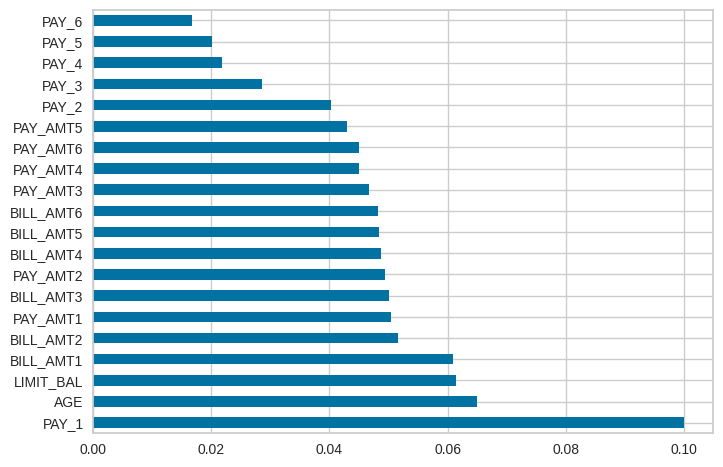

In [66]:
#Random forest feature importance
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', )

In [67]:
#oob score
model_rf_oob = RandomForestClassifier(n_estimators=166, max_features=6, oob_score=True, random_state=42).fit(X_train_scaled, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test_scaled)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)

OOB Score:			 0.8081
Testing Accuracy:		 0.8127
Acc. Difference:		 0.0046


Text(0, 0.5, 'Testing Accuracy')

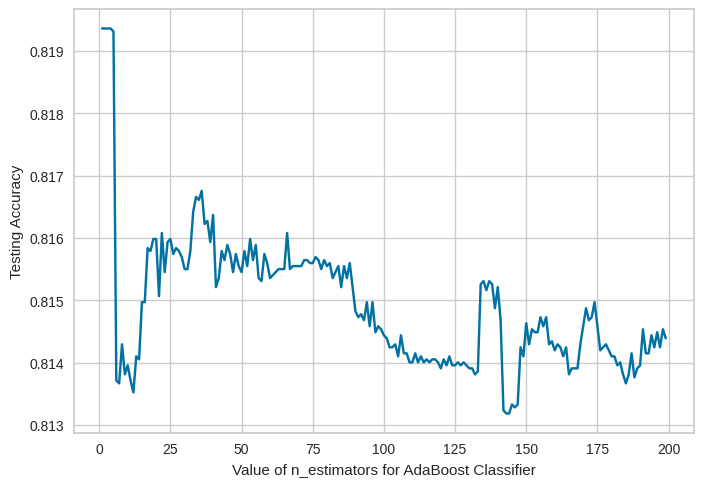

In [43]:
#Model 6
#adaboost n_estimator and testing accuracy
scoresada =[]
for k in range(1, 200):
    adac = AdaBoostClassifier(n_estimators=k)
    adac.fit(X_train_scaled, y_train)
    y_predada = adac.predict(X_test_scaled)
    scoresada.append(accuracy_score(y_test, y_predada))
import matplotlib.pyplot as plt
plt.plot(range(1, 200), scoresada)
plt.xlabel('Value of n_estimators for AdaBoost Classifier')
plt.ylabel('Testing Accuracy')


In [44]:
best_n_estimators = np.argmax(scoresada) + 1
best_accuracy = max(scoresada)

print("Best value of n_estimators:", best_n_estimators)
print("Best testing accuracy:", best_accuracy)


Best value of n_estimators: 1
Best testing accuracy: 0.8193619999034796


In [45]:
# AdaBoost Classification
base_est2 = DecisionTreeClassifier(max_depth = 7)
ada_boost = AdaBoostClassifier(base_est2, n_estimators=1, random_state=42, learning_rate=0.5)
ada_boost.fit(X_train_scaled, y_train)
predict_bs = ada_boost.predict(X_test_scaled)
accuracy_bs = accuracy_score(y_test, predict_bs)
print("Accuracy: ", accuracy_bs)

#cross-validation
adacv = cross_val_score(ada_boost, X_train_scaled, y_train, scoring='accuracy', cv=10)
adacv = pd.Series(adacv)
print("Cross validation: ", adacv.mean())

Accuracy:  0.8103855991506201
Cross validation:  0.8092342342342341


<Axes: >

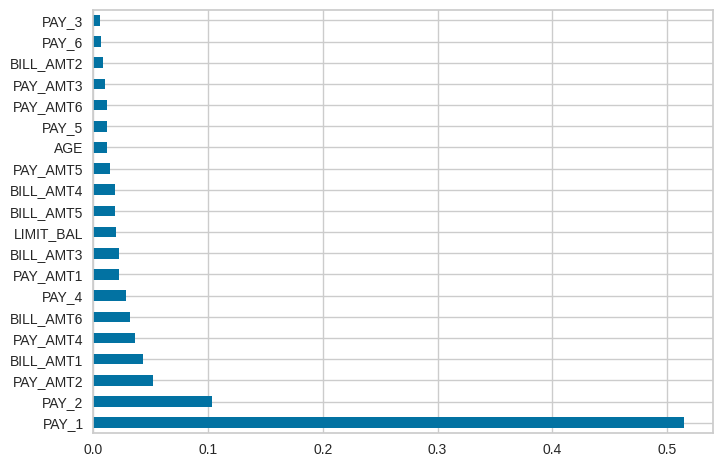

In [46]:
#AdaBoost feature importance
ada_importances = pd.Series(ada_boost.feature_importances_, index=X.columns)
ada_importances.nlargest(20).plot(kind='barh')

In [47]:
#Making individual predictions

def make_ind_prediction(new_data, threshold=0.2):
    data = new_data.values.reshape(1, -1)
    data = pd.DataFrame(data, columns=new_data.index)  # Create a DataFrame with feature names
    data = scaler.transform(data)
    prob = model_rf.predict_proba(data)[0][1]
    if prob >= threshold:
        return 'Will default'
    else:
        return 'Will pay'



In [48]:
from collections import OrderedDict

new_customer_values = [
    OrderedDict([
        ('EDU_1', 0), ('EDU_2', 1), ('EDU_3', 0), ('EDU_4', 0),
        ('MRG_1', 1), ('MRG_2', 0), ('MRG_3', 0), ('LIMIT_BAL', 90000), ('SEX', 2), ('AGE', 34),
        ('PAY_1', -1), ('PAY_2', 2), ('PAY_3', -1), ('PAY_4', -1), ('PAY_5', -2), ('PAY_6', -2),
        ('BILL_AMT1', 29239), ('BILL_AMT2', 14027), ('BILL_AMT3', 13559), ('BILL_AMT4', 14331),
        ('BILL_AMT5', 14948), ('BILL_AMT6', 15549), ('PAY_AMT1', 1518), ('PAY_AMT2', 150),
        ('PAY_AMT3', 1000), ('PAY_AMT4', 1000), ('PAY_AMT5', 1000), ('PAY_AMT6', 5000)
    ]),
    OrderedDict([('EDU_1',0),('EDU_2',1),('EDU_3',0),('EDU_4',0),
                            ('MRG_1',1),('MRG_2',0),('MRG_3',0),('LIMIT_BAL',20000),('SEX',2),('AGE',24),
                            ('PAY_1',2),('PAY_2',2),('PAY_3',-1),('PAY_4',-1),('PAY_5',-2),('PAY_6',-2),
                            ('BILL_AMT1',3913),('BILL_AMT2',3102),('BILL_AMT3',689),('BILL_AMT4',0),
                            ('BILL_AMT5',0),('BILL_AMT6',0),('PAY_AMT1',10),('PAY_AMT2',689),
                            ('PAY_AMT3',0),('PAY_AMT4',0),('PAY_AMT5',0),('PAY_AMT6',0)
                            ]),
    OrderedDict([
        ('EDU_1', 0), ('EDU_2', 1), ('EDU_3', 0), ('EDU_4', 0),
        ('MRG_1', 0), ('MRG_2', 1), ('MRG_3', 0), ('LIMIT_BAL', 50000), ('SEX', 2), ('AGE', 37),
        ('PAY_1', 0), ('PAY_2', 0), ('PAY_3', 0), ('PAY_4', 0), ('PAY_5', 0), ('PAY_6', 0),
        ('BILL_AMT1', 46990), ('BILL_AMT2', 48233), ('BILL_AMT3', 49291), ('BILL_AMT4', 28314),
        ('BILL_AMT5', 28959), ('BILL_AMT6', 29547), ('PAY_AMT1', 2000), ('PAY_AMT2', 2019),
        ('PAY_AMT3', 1200), ('PAY_AMT4', 1100), ('PAY_AMT5', 1069), ('PAY_AMT6', 1000)
    ]),
    OrderedDict([
        ('EDU_1', 0), ('EDU_2', 0), ('EDU_3', 1), ('EDU_4', 0),
        ('MRG_1', 1), ('MRG_2', 0), ('MRG_3', 0), ('LIMIT_BAL', 120000), ('SEX', 2), ('AGE', 26),
        ('PAY_1', -1), ('PAY_2', 2), ('PAY_3', 0), ('PAY_4', 0), ('PAY_5', 0), ('PAY_6', 2),
        ('BILL_AMT1', 2682), ('BILL_AMT2', 1725), ('BILL_AMT3', 2682), ('BILL_AMT4', 3272),
        ('BILL_AMT5', 3455), ('BILL_AMT6', 3261), ('PAY_AMT1', 0), ('PAY_AMT2', 1000),
        ('PAY_AMT3', 1000), ('PAY_AMT4', 1000), ('PAY_AMT5', 0), ('PAY_AMT6', 2000)])
]

for i, values in enumerate(new_customer_values, 1):
    new_customer = pd.Series(values)
    prediction = make_ind_prediction(new_customer)
    print(f"Prediction for test case {i}: {prediction}")


Prediction for test case 1: Will pay
Prediction for test case 2: Will default
Prediction for test case 3: Will pay
Prediction for test case 4: Will default
